In [1]:
"""Generate wordcloud images for our core tutorials."""

'Generate wordcloud images for our core tutorials.'

In [2]:
%matplotlib inline

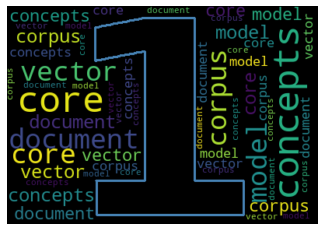

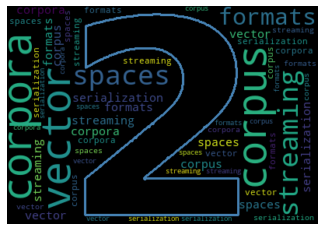

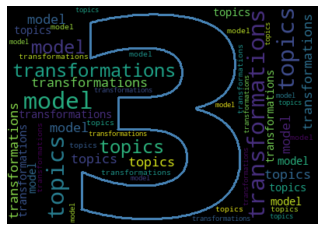

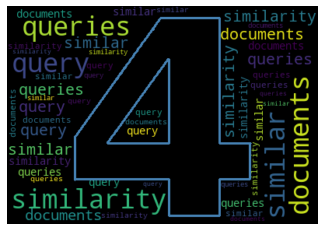

In [3]:
import os
import os.path as P
import re

import matplotlib.pyplot as plt
import numpy as np
import PIL
import wordcloud

def make_image(data, outputname, size=(1, 1), dpi=80):
    #
    # https://stackoverflow.com/questions/9295026/matplotlib-plots-removing-axis-legends-and-white-spaces
    #
    # Argh, getting the image saved without any borders is such a PITA
    #
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi)

def make_cloud(mask_path, text, out_path):
    mask = 255 - np.array(PIL.Image.open(mask_path))
    
    cloud = wordcloud.WordCloud(
        mask=mask,
        contour_width=3, 
        contour_color='steelblue',
        max_words=50,
        repeat=True,
    ).generate(text)
    
    cloud.to_file(out_path)
    
    plt.axis("off")
    plt.imshow(cloud, interpolation="bilinear")
    plt.show()

def make_clouds(subdir):
    masks = ('one.png', 'two.png', 'three.png', 'four.png')
    py_files = [P.join(subdir, f) for f in os.listdir(subdir) if f.endswith('.py')]
    text = [
        'core concepts document corpus model vector',
        'corpora vector spaces corpus streaming corpus formats serialization',
        'topics transformations model',
        'similarity queries query similar documents'
    ]
    for m, p, t in zip(masks, py_files, text):
        make_cloud(m, t, re.sub('.py$', '.png', p))
        
make_clouds('../gallery/core/')